In [1]:
import numpy as np
import pandas as pd
import json
from sklearn.preprocessing import MultiLabelBinarizer

In [123]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
movies_loc = "tmdb-5000-movie-dataset/tmdb_5000_movies.csv"
credits_loc = "tmdb-5000-movie-dataset/tmdb_5000_credits.csv"

movies = pd.read_csv(movies_loc)
credits = pd.read_csv(credits_loc)

In [4]:
def keepcast(row, k=10):
    d = json.loads(row)
    all_cast = [i['name'] for i in d]
    return all_cast[:k]

In [5]:
# Rename movies["id"] to "movie_id"
movies.rename(columns={"id" : "movie_id"}, inplace = True)

In [6]:
credits["cast_10"] = credits["cast"].apply(keepcast)

In [7]:
final_df = pd.merge(credits, movies, on = "movie_id")

In [8]:
final_df = final_df[["title_x", "cast_10", "revenue"]]

In [9]:
final_df

,title_x,cast_10,revenue
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",2787965087
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",961000000
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",880674609
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",1084939099
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",284139100
5,Spider-Man 3,"[Tobey Maguire, Kirsten Dunst, James Franco, T...",890871626
6,Tangled,"[Zachary Levi, Mandy Moore, Donna Murphy, Ron ...",591794936
7,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",1405403694
8,Harry Potter and the Half-Blood Prince,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...",933959197
9,Batman v Superman: Dawn of Justice,"[Ben Affleck, Henry Cavill, Gal Gadot, Amy Ada...",873260194


In [10]:
# Remove any rows where cast or revenue is 0
# Lol what are these movies
filter_out = final_df.loc[(final_df['cast_10'].map(len) == 0) | (final_df['revenue'] == 0)]

In [11]:
final_df = final_df[final_df['cast_10'].map(len) > 0]

In [12]:
final_df = final_df[final_df['revenue'] > 0]

In [13]:
final_df

,title_x,cast_10,revenue
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",2787965087
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",961000000
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",880674609
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",1084939099
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",284139100
5,Spider-Man 3,"[Tobey Maguire, Kirsten Dunst, James Franco, T...",890871626
6,Tangled,"[Zachary Levi, Mandy Moore, Donna Murphy, Ron ...",591794936
7,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",1405403694
8,Harry Potter and the Half-Blood Prince,"[Daniel Radcliffe, Rupert Grint, Emma Watson, ...",933959197
9,Batman v Superman: Dawn of Justice,"[Ben Affleck, Henry Cavill, Gal Gadot, Amy Ada...",873260194


In [14]:
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(final_df['cast_10']), columns = mlb.classes_, index = final_df.index)

In [15]:
res.shape

(3374, 13852)

In [55]:
new_df = pd.concat([final_df[['title_x', 'revenue']], res], axis = 1)

In [16]:
new_df.to_csv("ohe_movies.csv")

In [31]:
cast_10 = final_df['cast_10'].values
actor_dict = {}
for actors in cast_10:
    for actor in actors:
        try:
            actor_dict[actor] += 1
        except:
            actor_dict.update({actor : 1})

In [32]:
actor_dict = dict(sorted(actor_dict.items(), key=lambda x:x[1], reverse=True))

In [34]:
import matplotlib.pyplot as plt

(array([1.2614e+04, 7.3000e+02, 2.3200e+02, 1.4700e+02, 6.9000e+01,
        4.1000e+01, 1.2000e+01, 2.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

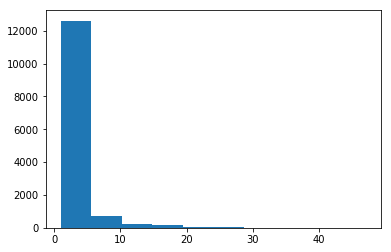

In [37]:
plt.hist(actor_dict.values())

In [91]:
def getActors(t = 15, actor_dict=actor_dict):
    count = 0
    actors = ['title_x', 'revenue']
    for item in actor_dict.items():
        if item[1] >= t:
            count += 1
            actors.append(item[0])
        else:
            break
    print(count)
    return actors

In [116]:
new_df_actor = new_df[getActors()]
new_df_actor['keep'] = new_df_actor[new_df_actor==1].any(1)
new_df_actor[new_df_actor['keep'] == True].shape

276


/Users/sarthak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(2413, 279)

In [117]:
new_df.shape

(3374, 13855)

In [118]:
new_df_actor.head()

,title_x,revenue,Robert De Niro,Morgan Freeman,Samuel L. Jackson,Matt Damon,Bruce Willis,Brad Pitt,Johnny Depp,Owen Wilson,...,Jason Lee,Rachel McAdams,Christina Applegate,Bruce McGill,Danny Trejo,Clint Eastwood,Ray Liotta,Dermot Mulroney,Nia Long,keep
0,Avatar,2787965087,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,Pirates of the Caribbean: At World's End,961000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,True
2,Spectre,880674609,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,The Dark Knight Rises,1084939099,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
4,John Carter,284139100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


In [119]:
Y = new_df_actor.iloc[:, 1]
X = new_df_actor.iloc[:, 2:]

In [121]:
min(Y), max(Y)

(5, 2787965087)

In [122]:
Y_Cat = np.where(Y.values > 100000000, 1, 0)

In [135]:
def fitModel(X, Y, test_size=0.8, model=LinearRegression(), cat=False):
#     model = LinearRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    if not cat: 
        score = r2_score(Y_test, Y_pred)
    else:
        score = model.score(X_test, Y_test)
    plt.plot(Y_pred, Y_test, 'o')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Score : ' + str(score))
    plt.show()
    #return model.coef_

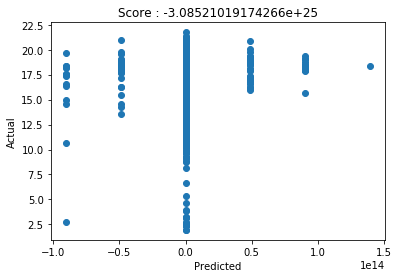

In [129]:
fitModel(X, np.log(Y))

/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


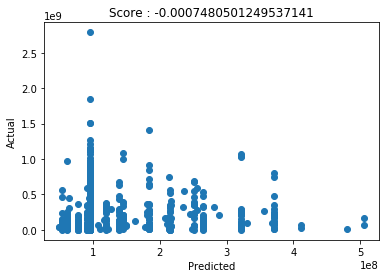

In [105]:
from  sklearn.ensemble import RandomForestRegressor
fitModel(X, Y, model=RandomForestRegressor())

/Users/sarthak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


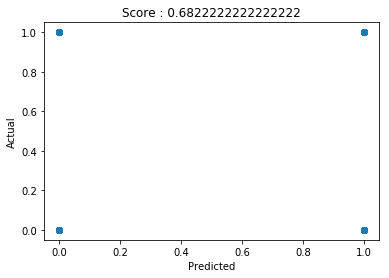

In [136]:
fitModel(X, Y_Cat, model=LogisticRegression(), cat=True)